## Tutorial on Deep Learning Networks
Introduction to:

- MLPs: Multilayer perceptrons
- RNNs: Recurrent neural networks
- CNNs: Convolutional neural networks

**Multilayer perceptrons** or MLPs are a fully-connected network. MLPs are common in simple logistic
and linear regression problems. However, MLPs are not optimal for processing
sequential and multi-dimensional data patterns. By design, MLPs struggle to
remember patterns in sequential data and requires a substantial number of
parameters to process multi-dimensional data.

For sequential data input, **RNNs** are popular because the internal design allows
the network to discover dependency in the history of data that is useful for
prediction. For multi-dimensional data like images and videos, a **CNN** excels
in extracting feature maps for classification, segmentation, generation, and other
purposes. In some cases, a CNN in the form of a 1D convolution is also used for
networks with sequential input data. However, in most deep learning models,
MLPs, RNNs, and CNNs are combined to make the most out of each network.


This work references the following sources:
- `www.machinelearningmastery.com/`
- `www.manning.com/books/deep-learning-with-python`
- `www.packtpub.com/big-data-and-business-intelligence/advanced-deep-learning-keras`

## Multilayer Perceptrons

Use the famous MNIST dataset of digits

In [23]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from glob import glob
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,SimpleRNN
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, Flatten


In [2]:
#load the dataset
(x_train,y_train) , (x_test, y_test) = mnist.load_data()

#count num of unique training labels
unique, counts = np.unique(y_train,return_counts = True)
print("Train labels: ",dict(zip(unique,counts)))

#do same for test
unique,counts = np.unique(y_test,return_counts=True)
print("Test labels: ", dict(zip(unique,counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [3]:
#60000 images of shape 28x28
x_train.shape

(60000, 28, 28)

In [4]:
#sample some random digits
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]
#print(indexes)
print(images.shape)

(25, 28, 28)


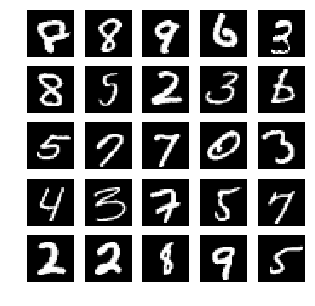

In [5]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.show()    


While MNIST data are 2D tensors, they should be reshaped accordingly
depending on the type of input layer. The following figure shows how a 3 × 3
grayscale image is reshaped for MLPs, CNNs, and RNNs input layers:

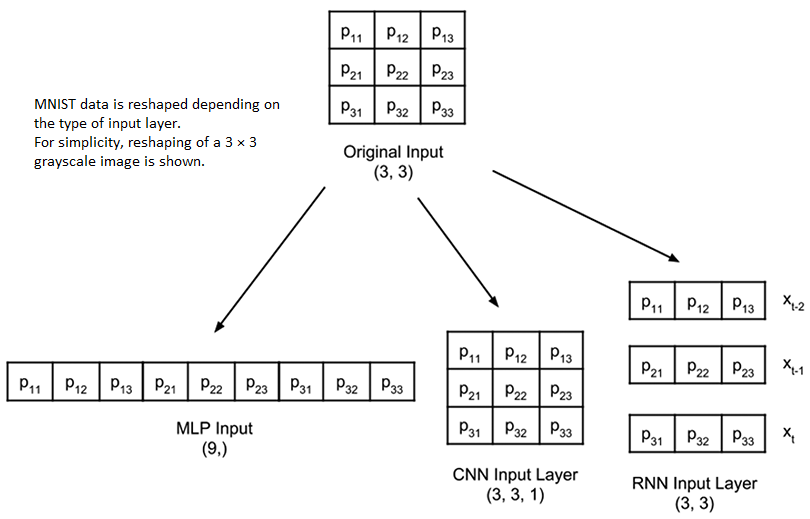

In [6]:
path = 'D:\\ml_code\\keras\\images\\blocks2.png'
Image(filename=path,width = 600,height=600)

### MNIST digits classifier model

In [7]:
#load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train.shape)

(60000,)


In [8]:
#compute the number of labels - 0 to 9
num_labels = len(np.unique(y_train))

#one hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#encode each of the integer targets as row vector, the '1' position indicates wuch integet it represents
y_train.shape

(60000, 10)

In [9]:
#represents '5
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
#image dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size

#The proposed model is based on MLP layers. Therefore, the input is expected to
#be a 1D tensor. As such, x_train and x_test are reshaped to [60000, 28 * 28] and
#[10000, 28 * 28], respectively
#resize and norm
x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32')/255
x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32')/255

In [11]:
#network parameters
#At 128 units, the network converges quickly, but has a lower test accuracy. The added number
#units for 512 or 1,024 does not increase the test accuracy significantly
#The number of units is a hyperparameter. It controls the capacity of the network.
#The capacity is a measure of the complexity of the function that the network can
#approximate.

batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

In [12]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is a good metric for classification tasks
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.4227 - acc: 0.8715
Epoch 2/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1926 - acc: 0.9426
Epoch 3/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1486 - acc: 0.9556
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1295 - acc: 0.9609
Epoch 5/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.1117 - acc: 0.9662
Epoch 6/20
60000/60000 [==============================] - 3s 57us/step - loss: 0.1026 - acc: 0.9685
Epoch 7/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.0897 - acc: 0.9722
Epoch 8/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0844 - acc: 0.9740
Epoch 9/20
60000/60000 [==============================] - 4s 60us/step - loss: 0.0806 - acc: 0.9750
Epoch 10/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0758 - acc: 0.9764

Since a `Dense` layer is a linear operation, a sequence of `Dense` layers can only
approximate a linear function. The problem is that the MNIST digit classification is
inherently a non-linear process. Inserting a `relu` activation between Dense layers will
enable MLPs to model non-linear mappings. `relu` or Rectified Linear Unit (ReLU)
is a simple non-linear function. 

### Regularizers
A neural network has the tendency to memorize its training data especially
if it contains more than enough capacity. In such a case, the network fails
catastrophically when subjected to the test data. This is the classic case of the
network failing to generalize. To avoid this tendency, the model uses a regularizing
layer or function. A common regularizing layer is referred to as a dropout.

The idea of dropout is simple. Given a dropout rate (here, it is set to dropout=0.45),
the Dropout layer randomly removes that fraction of units from participating in
the next layer. For example, if the first layer has 256 units, after dropout=0.45 is
applied, only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2.
The Dropout layer makes neural networks robust to unforeseen input data because
the network is trained to predict correctly, even if some units are missing. It's worth
noting that dropout is not used in the output layer and it is only active during
training. Moreover, dropout is not present during prediction.

There are regularizers that can be used other than dropouts like l1 or l2. In Keras,
the bias, weight and activation output can be regularized per layer. l1 and l2 favor
smaller parameter values by adding a penalty function. Both l1 and l2 enforce
the penalty using a fraction of the sum of absolute (l1) or square (l2) of parameter
values. In other words, the penalty function forces the optimizer to find parameter
values that are small. Neural networks with small parameter values are more
insensitive to the presence of noise from within the input data

### Output activation and loss function
The output layer has 10 units followed by softmax activation. The 10 units
correspond to the 10 possible labels, classes or categories.

The softmax equation is applied to all N = 10 outputs, xi for i = 0, 1 … 9 for the final prediction.
Softmax squashes the outputs into probabilities
by normalizing the prediction. In this example each predicted output is a probability that the
index is the correct label of the given input image. The sum of all the probabilities for
all outputs is 1.0. For example, when the softmax layer generates a prediction, it will
be a 10-dim 1D tensor. 

### Optimization
With optimization, the objective is to minimize the loss function. The idea is that
if the loss is reduced to an acceptable level, the model has indirectly learned the
function mapping input to output. Performance metrics are used to determine if
a model has learned the underlying data distribution. The default metric in Keras
is loss. During training, validation, and testing, other metrics such as accuracy
can also be included. Accuracy is the percent, or fraction, of correct predictions
based on ground truth. In deep learning, there are many other performance
metrics. However, it depends on the target application of the model. In literature,
performance metrics of the trained model on the test dataset is reported for
comparison to other deep learning models.

In Keras, there are several choices for optimizers. The most commonly used
optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam),
and Root Mean Squared Propagation (RMSprop). Each optimizer features tunable
parameters like learning rate, momentum, and decay. Adam and RMSprop are
variations of SGD with adaptive learning rates. In the proposed classifier network,
Adam is used since it has the highest test accuracy.


## Convolutional Neural Networks (CNNs)

Instead of having input vector,
the input tensor now has new dimensions (height, width, channels) or (image_size,
image_size, 1) = (28, 28, 1) for the grayscale MNIST images. Resizing the train and
test images will be needed to conform to this input shape requirement.

In [18]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# input image dimensions
image_size = x_train.shape[1]

# resize and normalize
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape,y_train.shape)

(60000, 28, 28, 1) (60000, 10)


In [21]:
# image is processed as is (square grayscale)
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

# model is a stack of CNN-ReLU-MaxPooling
model = Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())

# dropout added as regularizer
model.add(Dropout(dropout))

# output layer is 10-dim one-hot vector
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# train the network
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 576)               0         
__________

###  Convolution
If in the MLP model the number of units characterizes the Dense layers, the kernel
characterizes the CNN operations. The kernel can be
visualized as a rectangular patch or window that slides through the whole image
from left to right, and top to bottom. This operation is called convolution. It
transforms the input image into a feature maps, which is a representation of what
the kernel has learned from the input image. The feature maps are then transformed
into another feature maps in the succeeding layer and so on. The number of feature
maps generated per Conv2D is controlled by the filters argument.

The computation involved in the convolution is shown in the figure below. For
simplicity, a 5 × 5 input image (or input feature map) where a 3 × 3 kernel is applied
is illustrated. The resulting feature map is shown after the convolution. The value
of one element of the feature map is shaded. You'll notice that the resulting feature
map is smaller than the original input image, this is because the convolution is only
performed on valid elements. The kernel cannot go beyond the borders of the image.
If the dimensions of the input should be the same as the output feature maps, Conv2D
will accept the option padding='same'. The input is padded with zeroes around its
borders to keep the dimensions unchanged after the convolution:

### Pooling operations
The last change is the addition of a MaxPooling2D layer with the argument
pool_size=2. MaxPooling2D compresses each feature map. Every patch of
size pool_size × pool_size is reduced to one pixel. The value is equal to the
maximum pixel value within the patch. MaxPooling2D is shown in the following
figure for two patches:

The output of the last MaxPooling2D is a stack of feature maps. The role of Flatten
is to convert the stack of feature maps into a vector format that is suitable for either
Dropout or Dense layers, similar to the MLP model output layer

As shown above, the CNN model requires a smaller number
of parameters at 80,226 compared to 269,322 when MLP layers are used. The
conv2d_1 layer has 640 parameters because each kernel has 3 × 3 = 9 parameters,
and each of the 64 feature maps has one kernel and one bias parameter. The number
of parameters for other convolution layers can be computed in a similar way.

The results above show that the maximum test accuracy of 99.4% which can be achieved
for a 3–layer network with 64 feature maps per layer using the Adam optimizer with
dropout=0.2. CNNs are more parameter efficient and have a higher accuracy than
MLPs. Likewise, CNNs are also suitable for learning representations from sequential
data, images, and videos

## Recurrent Neural Networks (RNNs)
While each MNIST data sample is not sequential in nature,  every image can be interpreted as a sequence of rows
or columns of pixels. Thus, a model based on RNNs can process each MNIST image
as a sequence of 28-element input vectors with timesteps equal to 28. 

In [24]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# compute the number of labels
num_labels = len(np.unique(y_train))
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# resize and normalize
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

# model is RNN with 256 units, input is 28-dim vector 28 timesteps
model = Sequential()
model.add(SimpleRNN(units=units,dropout=dropout,input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
#plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

# loss function for one-hot vector
# use of sgd optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               72960     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.7874 - acc: 0.7690
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3787 - acc: 0.8854
Epoch 3/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.2819 - acc: 0.9151
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2335 - acc: 0.9297
Ep

There are the two main differences between RNNs and the two previous models.
First is the input_shape = (image_size, image_size) which is actually input_
shape = (timesteps, input_dim) or a sequence of input_dim—dimension
vectors of timesteps length. Second is the use of a `SimpleRNN` layer to represent
an RNN cell with units=256. The units variable represents the number of output
units. If the CNN is characterized by the convolution of kernel across the input
feature map, the RNN output is a function not only of the present input but also
of the previous output or hidden state. 

Since the previous output is also a function
of the previous input, the current output is also a function of the previous output
and input and so on. The SimpleRNN layer in Keras is a simplified version of the
true RNN. The following, equation describes the output of `SimpleRNN`:

`ht = tanh(b + Wht-1 + Uxt)` 

In this equation, b is the bias, while W and U are called recurrent kernel
(weights for previous output) and kernel (weights for the current input) respectively.
Subscript t is used to indicate the position in the sequence. For `SimpleRNN` layer with
units=256, the total number of parameters is 256 + 256 × 256 + 256 × 28 = 72,960
corresponding to b, W, and U contributions

In many deep neural networks, other members of the RNN family are more
commonly used. For example, `Long Short-Term Memory` (LSTM) networks have
been used in both machine translation and question answering problems. LSTM
networks address the problem of long-term dependency or remembering relevant
past information to the present output.

The `LSTM()` layer can be used as a drop-in replacement to `SimpleRNN()`. If LSTM
is overkill for the task at hand, a simpler version called `Gated Recurrent Unit
(GRU)` can be used. GRU simplifies LSTM by combining the cell state and hidden
state together. GRU also reduces the number of gates by one. The GRU() function
can also be used as a drop-in replacement for SimpleRNN().